<a href="https://colab.research.google.com/github/mikeshawcode/change-compository/blob/main/PatriotsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to analyze how the Patriots distribute the football to their recievers.

Patriots Recieving Breakdown - by the stats

In [1]:
!pip install requests beautifulsoup4 lxml pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd

Scraping, and cleaning the data

Data scrapped from pro football reference

In [2]:
# scrape the data

url = 'https://www.pro-football-reference.com/teams/nwe/2025.htm'
pats_response = requests.get(url)
pats_soup = BeautifulSoup(pats_response.text, 'lxml')

In [3]:
pats_tables = pd.read_html(url)
len(pats_tables)  # See how many tables there are

6

In [4]:
# grab the columns we want
pats_RushingReceiving = pats_tables[4]
pats_passCatchers = pats_RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]

# get rid of the people that dont count for recivers (Drake Maye, other practice squad players)
pats_passCatchers = pats_passCatchers.drop(pats_passCatchers.index[7])
pats_passCatchers = pats_passCatchers.drop(pats_passCatchers.index[14])
pats_passCatchers = pats_passCatchers.drop(pats_passCatchers.index[-1])

In [6]:
# sort by high to low
pats_passCatchers = pats_passCatchers.sort_values(by=('Receiving', 'Rec'), ascending=False)

Data is cleaned, time to get into analysis

Time to answer some questions with our data:


Who is the '"safety blanket" for Drake Maye?

 (A safety blanket for a QB is someone who often catches passes, specifically for first downs)




Analysis on percentage of receptions that are first downs

In [7]:
pats_passCatchers['First Down Percentage'] = (pats_passCatchers[('Receiving', '1D')] / pats_passCatchers[('Receiving', 'Rec')]) * 100
#Finding percenetage of catches that are first downs

pats_passCatchers['First Down Percentage'] = pats_passCatchers['First Down Percentage'].round(2)
#rounding number

pats_passCatchers_firstDowns = pats_passCatchers.sort_values(by=('First Down Percentage'), ascending=False)
#sorting

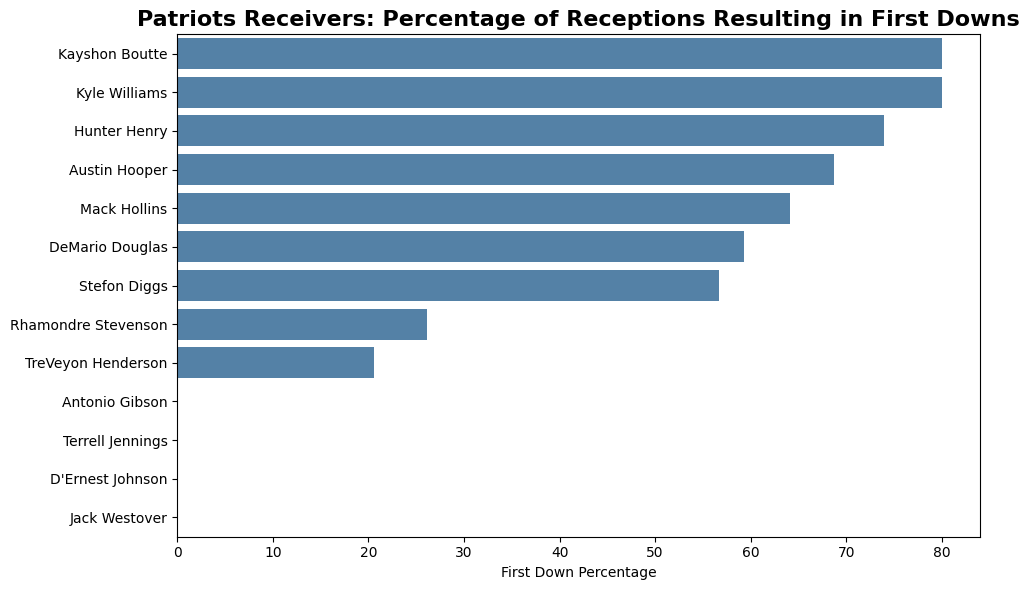

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort players by first down percentage
plot_df = pats_passCatchers.sort_values('First Down Percentage', ascending=False)

# plot it
plt.figure(figsize=(10, 6))

sns.barplot(
    data=plot_df,
    x='First Down Percentage',
    y=('Unnamed: 1_level_0', 'Player'),
    color='steelblue'
)

plt.title('Patriots Receivers: Percentage of Receptions Resulting in First Downs', fontsize=16, fontweight='bold')
plt.xlabel('First Down Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

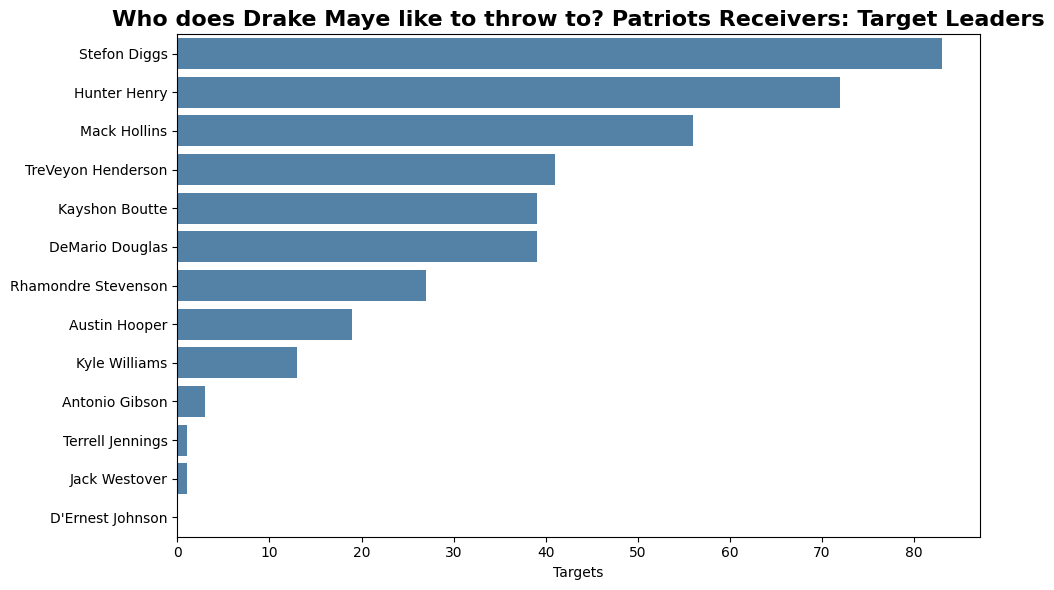

In [9]:
# Sort players by target amounts
plot_df = pats_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)

# plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=plot_df,
    x=('Receiving', 'Tgt'),
    y=('Unnamed: 1_level_0', 'Player'),
    color='steelblue'
)

plt.title('Who does Drake Maye like to throw to? Patriots Receivers: Target Leaders', fontsize=16, fontweight='bold')
plt.xlabel('Targets')
plt.ylabel('')

plt.tight_layout()
plt.show()

Time to compare to the top teams in the league. A few weeks ago, these were the tops teams, things have changed. Let's see how they spread the ball out

Cleaning all the data from all the different teams

In [10]:
#COLTS

# clean data the same way we did for the patriots
colts_url = 'https://www.pro-football-reference.com/teams/clt/2025.htm'
colts_response = requests.get(colts_url)
colts_soup = BeautifulSoup(colts_response.text, 'lxml')

colts_tables = pd.read_html(colts_url)
len(colts_tables)  # See how many tables are available
colts_RushingReceiving = colts_tables[4]
colts_passCatchers = colts_RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]

colts_passCatchers = colts_passCatchers.drop(colts_passCatchers.index[-1])

colts_passCatchers_byTargets = colts_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)




In [11]:
#BRONCOS

# clean data the same way we did for the patriots
broncos_url = 'https://www.pro-football-reference.com/teams/den/2025.htm'
broncos_response = requests.get(broncos_url)
broncos_soup = BeautifulSoup(broncos_response.text, 'lxml')

broncos_tables = pd.read_html(broncos_url)
len(broncos_tables)  # See how many tables are available
RushingReceiving = broncos_tables[4]
broncos_passCatchers = RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]

broncos_passCatchers = broncos_passCatchers.drop(broncos_passCatchers.index[-1])

broncos_passCatchers_byTargets = broncos_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)



In [12]:
#EAGLES

# clean data the same way we did for the patriots
eagles_url = 'https://www.pro-football-reference.com/teams/phi/2025.htm'
eagles_response = requests.get(eagles_url)
eagles_soup = BeautifulSoup(eagles_response.text, 'lxml')

eagles_tables = pd.read_html(eagles_url)
len(eagles_tables)  # See how many tables are available
eagles_RushingReceiving = eagles_tables[4]
eagles_passCatchers = eagles_RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]
eagles_passCatchers = eagles_passCatchers.drop(eagles_passCatchers.index[-1])

eagles_passCatchers_byTargets = eagles_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)


In [13]:
#RAMS

# clean data the same way we did for the patriots
rams_url = 'https://www.pro-football-reference.com/teams/ram/2025.htm'
rams_response = requests.get(rams_url)
rams_soup = BeautifulSoup(rams_response.text, 'lxml')

rams_tables = pd.read_html(rams_url)
len(rams_tables)  # See how many tables are available
rams_RushingReceiving = rams_tables[4]
rams_passCatchers = rams_RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]

rams_passCatchers = rams_passCatchers.drop(rams_passCatchers.index[-1])
rams_passCatchers_byTargets = rams_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)


In [14]:
#SEAHAWKS

# clean data the same way we did for the patriots
hawks_url = 'https://www.pro-football-reference.com/teams/sea/2025.htm'
hawks_response = requests.get(hawks_url)
hawks_soup = BeautifulSoup(hawks_response.text, 'lxml')

hawks_tables = pd.read_html(hawks_url)
len(hawks_tables)  # See how many tables are available
hawks_RushingReceiving = hawks_tables[4]
hawks_passCatchers = hawks_RushingReceiving[
    [
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Receiving', 'Tgt'),
        ('Receiving', 'Yds'),
        ('Receiving', 'Rec'),
        ('Receiving', 'Y/R'),
        ('Receiving', 'TD'),
        ('Receiving', '1D'),
        ('Receiving', 'Succ%'),
        ('Receiving', 'Lng'),
        ('Receiving', 'R/G'),
        ('Receiving', 'Y/G'),
        ('Receiving', 'Ctch%'),
        ('Receiving', 'Y/Tgt')
    ]
]
hawks_passCatchers = hawks_passCatchers.drop(hawks_passCatchers.index[-1])

hawks_passCatchers_byTargets = hawks_passCatchers.sort_values(('Receiving', 'Tgt'), ascending=False)


Creating new columns for the team abbreviation

In [15]:
pats_passCatchers["Team"] = "NE"
eagles_passCatchers["Team"] = "PHI"
rams_passCatchers["Team"] = "LAR"
colts_passCatchers["Team"] = "IND"
broncos_passCatchers["Team"] = "DEN"
hawks_passCatchers["Team"] = "SEA"

Merge them all together, to make one big dataframe

In [16]:
allTeams = pd.concat(
    [pats_passCatchers, colts_passCatchers, eagles_passCatchers, rams_passCatchers, hawks_passCatchers, broncos_passCatchers],
    ignore_index=True
)

allTeams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Unnamed: 1_level_0, Player)  104 non-null    object 
 1   (Unnamed: 3_level_0, Pos)     104 non-null    object 
 2   (Receiving, Tgt)              104 non-null    int64  
 3   (Receiving, Yds)              104 non-null    int64  
 4   (Receiving, Rec)              104 non-null    int64  
 5   (Receiving, Y/R)              78 non-null     float64
 6   (Receiving, TD)               104 non-null    int64  
 7   (Receiving, 1D)               104 non-null    int64  
 8   (Receiving, Succ%)            85 non-null     float64
 9   (Receiving, Lng)              77 non-null     float64
 10  (Receiving, R/G)              104 non-null    float64
 11  (Receiving, Y/G)              104 non-null    float64
 12  (Receiving, Ctch%)            85 non-null     float64
 13  (Rece

In [17]:
allTeams_rec = allTeams[[('Unnamed: 1_level_0', 'Player'),('Team',''), ('Receiving', 'Tgt')]]


Creating 6 bar charts for the different teams to compare visually how teams spread the ball out

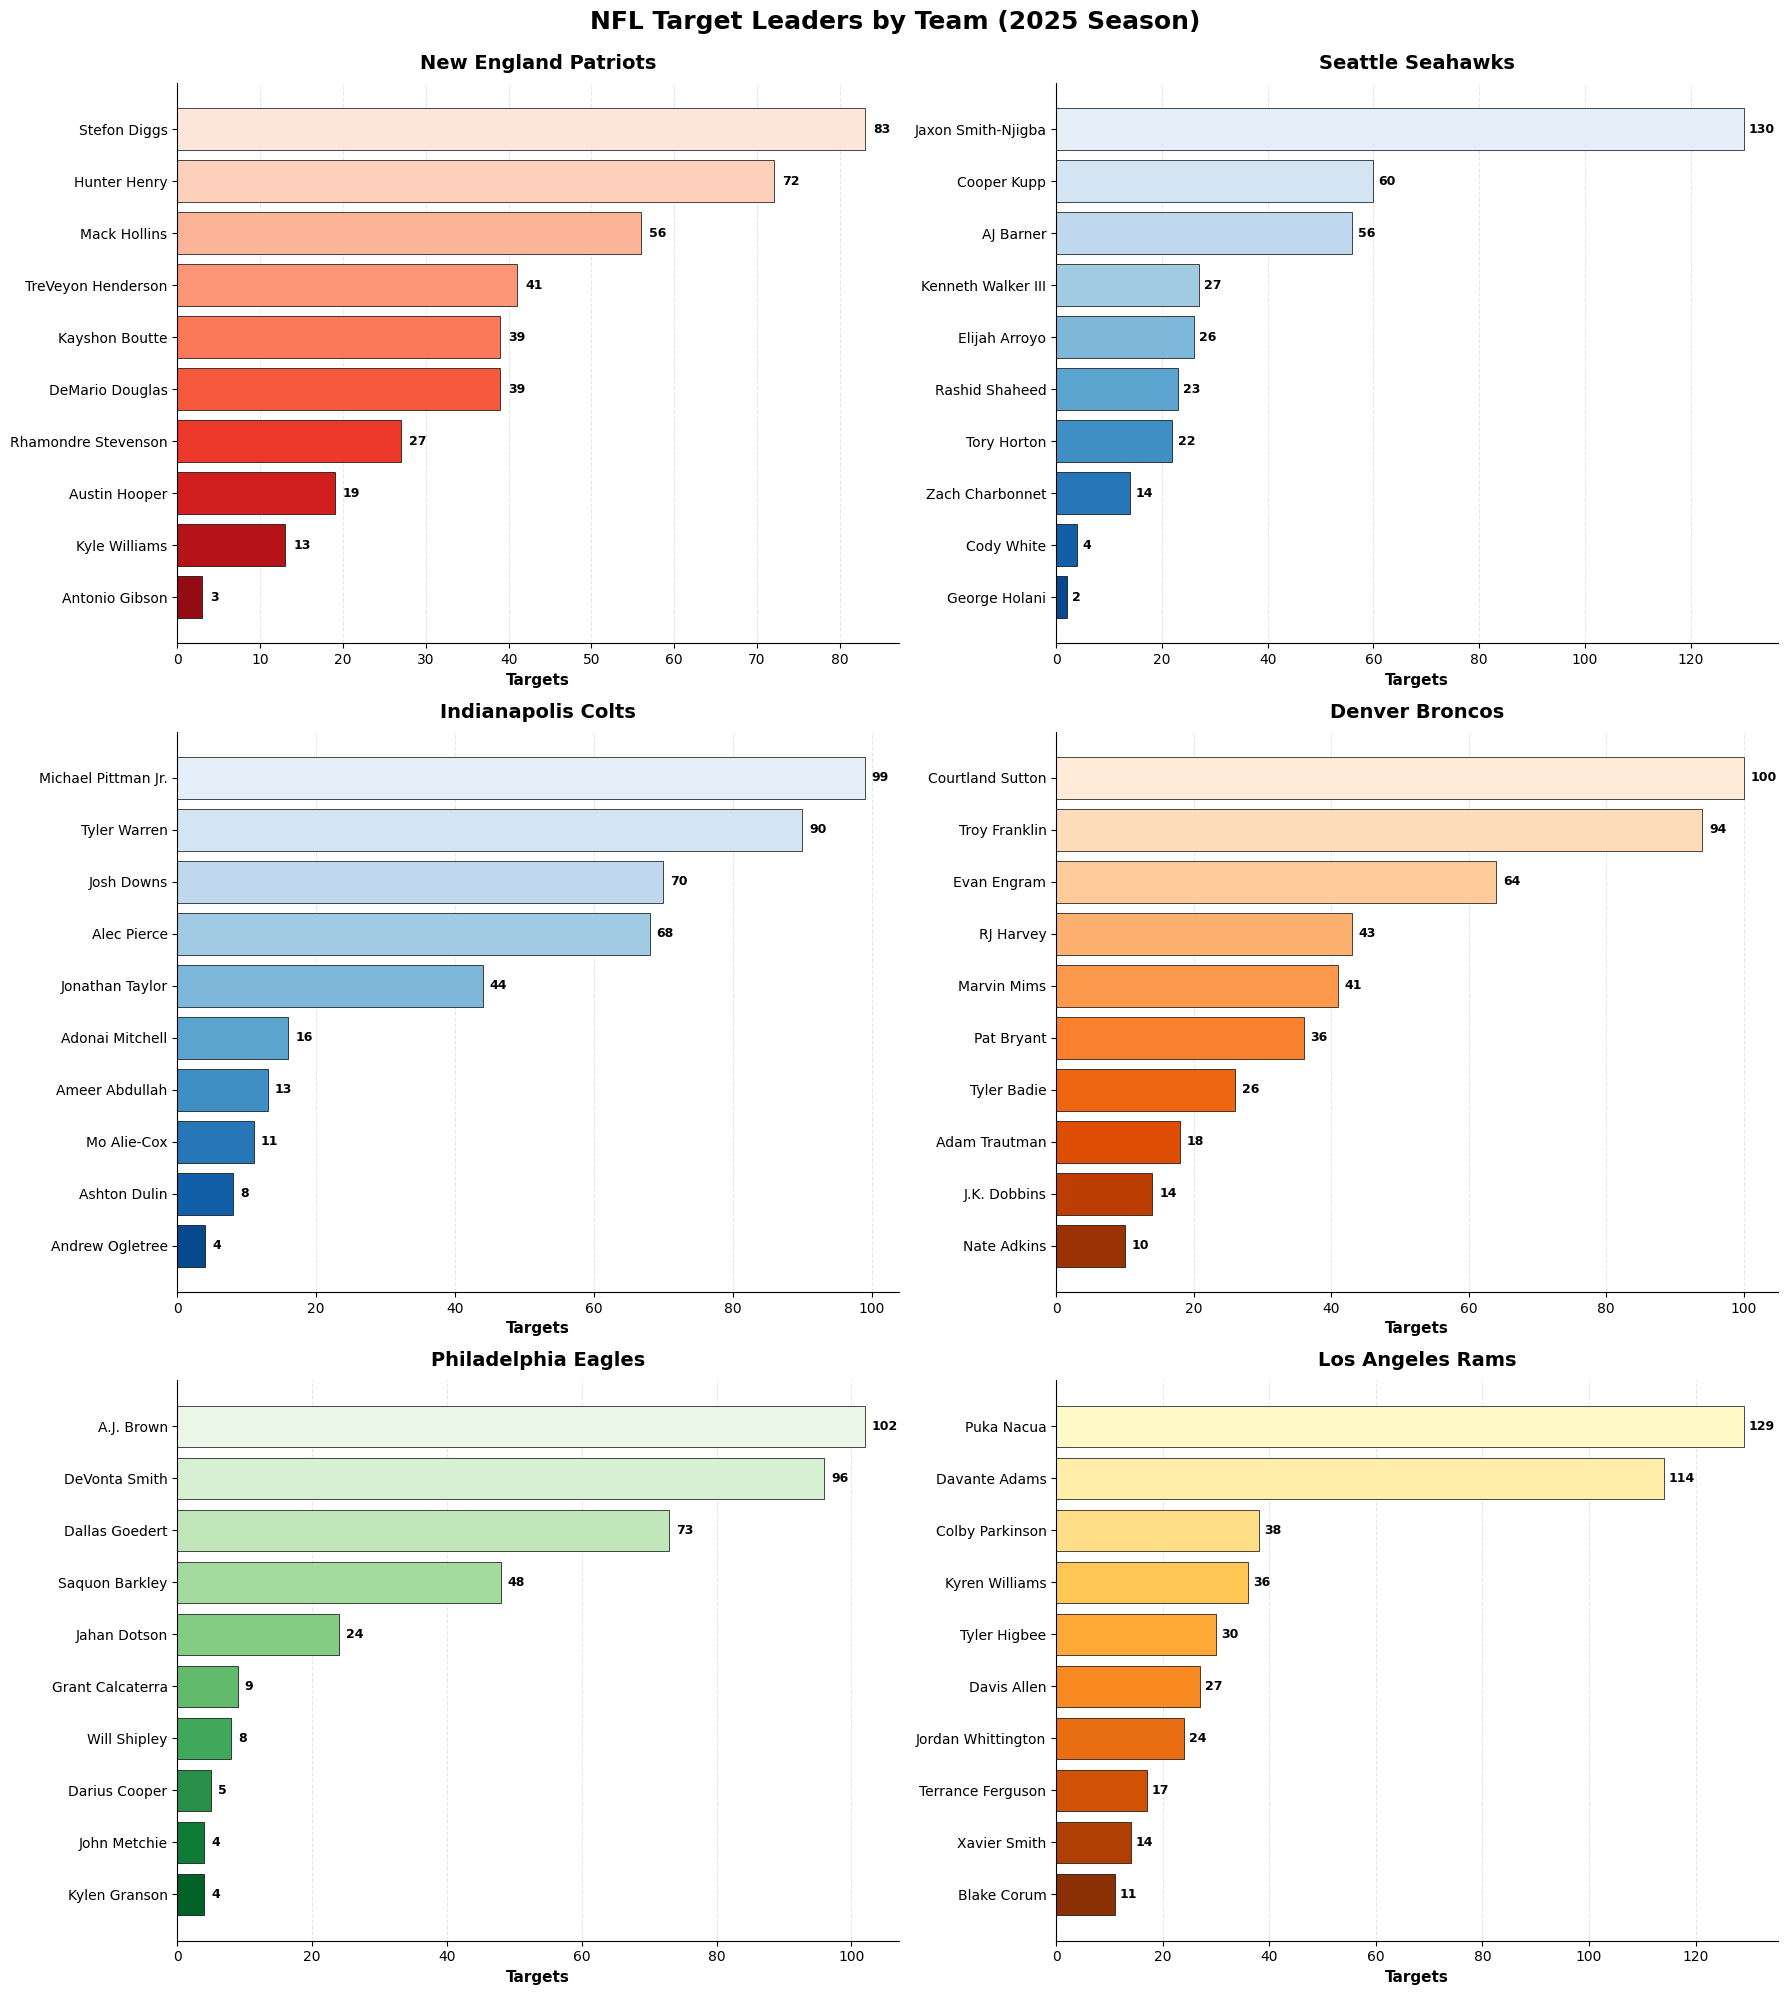

In [18]:
# prepare data
df_heat = pd.DataFrame({
    'Player': allTeams_rec[('Unnamed: 1_level_0', 'Player')],
    'Team': allTeams_rec[('Team', '')],
    'Tgt': allTeams_rec[('Receiving', 'Tgt')]
})

# team configurations with colors
team_info = {
    'NE': {'name': 'New England Patriots', 'color': 'Reds'},
    'SEA': {'name': 'Seattle Seahawks', 'color': 'Blues'},
    'IND': {'name': 'Indianapolis Colts', 'color': 'Blues'},
    'DEN': {'name': 'Denver Broncos', 'color': 'Oranges'},
    'PHI': {'name': 'Philadelphia Eagles', 'color': 'Greens'},
    'LAR': {'name': 'Los Angeles Rams', 'color': 'YlOrBr'}
}

teams = ['NE', 'SEA', 'IND', 'DEN', 'PHI', 'LAR']

# create figure
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
axes = axes.flatten()

for i, team in enumerate(teams):
    ax = axes[i]

    # filter and sort team data
    team_df = df_heat[df_heat['Team'] == team].copy()
    team_df = team_df.sort_values('Tgt', ascending=False).head(10)  # Top 10 only

    # create horizontal bar chart
    colors = sns.color_palette(team_info[team]['color'], n_colors=len(team_df))

    bars = ax.barh(team_df['Player'], team_df['Tgt'], color=colors, edgecolor='black', linewidth=0.5)

    # add value labels on bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontsize=9, fontweight='bold')

    # styling
    ax.set_title(team_info[team]['name'], fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('Targets', fontsize=11, fontweight='bold')
    ax.set_ylabel('')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    ax.invert_yaxis()  # Highest at top

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove unused subplots
for j in range(len(teams), len(axes)):
    axes[j].axis('off')

plt.suptitle('NFL Target Leaders by Team (2025 Season)',
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

Finally, a Lorenz Curve to show the line of perfect distribution, and prove that the patriots distribute the ball better than the top teams in the league.

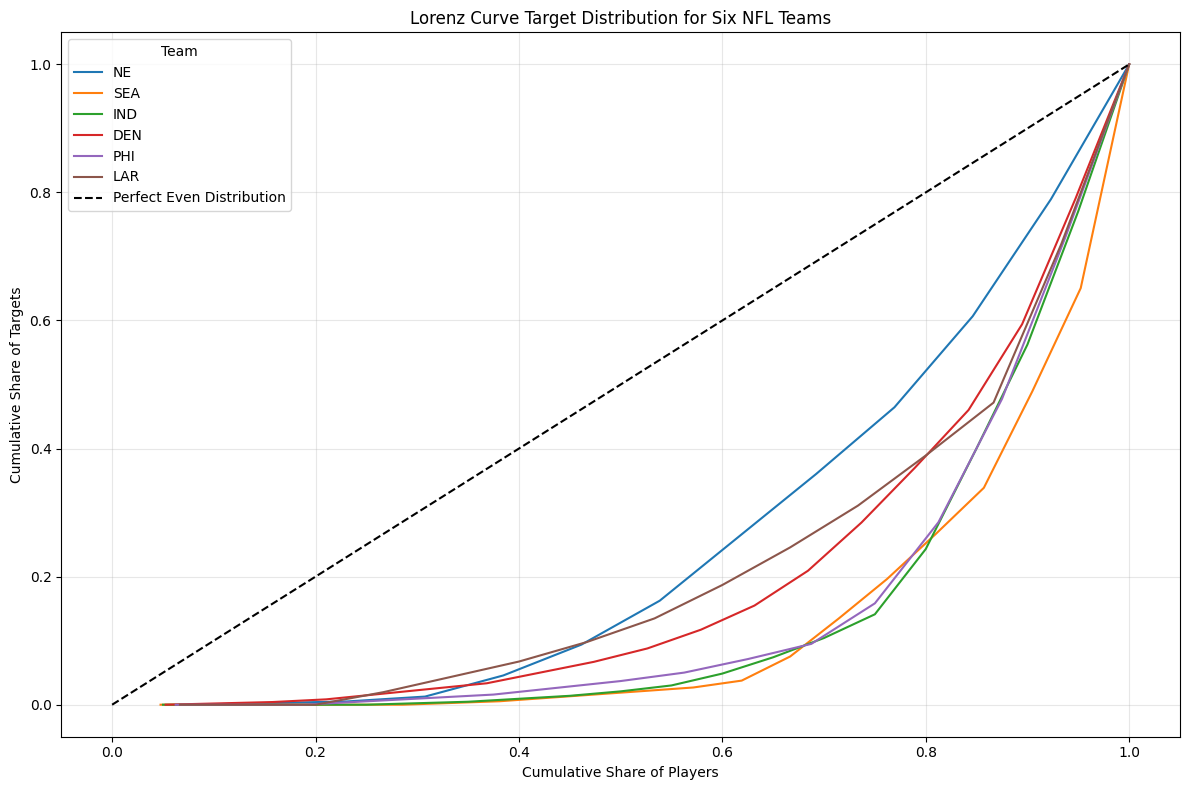

In [19]:
import numpy as np

# Build simple working DataFrame
df_lorenz = pd.DataFrame({
    'Player': allTeams_rec[('Unnamed: 1_level_0', 'Player')],
    'Team': allTeams_rec[('Team', '')],
    'Tgt': allTeams_rec[('Receiving', 'Tgt')]
})

teams = ['NE', 'SEA', 'IND', 'DEN', 'PHI', 'LAR']

plt.figure(figsize=(12, 8))

for team in teams:
    team_df = df_lorenz[df_lorenz['Team'] == team]

    # Sort by targets
    values = np.sort(team_df['Tgt'].values)

    # Compute Lorenz curve points
    cumulative_targets = np.cumsum(values)
    cumulative_targets = cumulative_targets / cumulative_targets[-1]   # normalize

    num_players = len(values)
    cumulative_players = np.arange(1, num_players + 1) / num_players

    # Plot curve
    plt.plot(cumulative_players, cumulative_targets, label=team)

# Plot perfect equality reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Perfect Even Distribution')

plt.title('Lorenz Curve Target Distribution for Six NFL Teams')
plt.xlabel('Cumulative Share of Players')
plt.ylabel('Cumulative Share of Targets')
plt.legend(title='Team')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()